<a href="https://colab.research.google.com/github/Mainabryan/-DropNet-Predicting-University-Dropout-Risk-in-Kenya/blob/main/Retail_Sales_machine_leanring_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import the necessrty libariries

In [3]:
# Core data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # for interactive time-series plots

# Machine Learning / Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Time-Series Forecasting
from prophet import Prophet   # Facebook (Meta) Prophet
import statsmodels.api as sm  # ARIMA, SARIMA
import xgboost as xgb         # XGBoost models


#Load the dataset

In [5]:
data = pd.read_csv('/content/restaurant_sales_dataset.csv')

## EXPLATORY DATA ANALSYSIS

In [6]:
# HEAD
data.head()

,Date,DayOfWeek,DailySales,OrdersCount,Weather,HolidayOrEvent,StaffCount
0,2024-01-01,Monday,1058.0,46,Snowy,NaN,3
1,2024-01-02,Tuesday,4272.0,109,Cloudy,NaN,6
2,2024-01-03,Wednesday,3592.0,95,Cloudy,NaN,5
3,2024-01-04,Thursday,966.0,38,Cloudy,NaN,3
4,2024-01-05,Friday,4926.0,242,Snowy,NaN,9


In [7]:
#tail
data.tail()

,Date,DayOfWeek,DailySales,OrdersCount,Weather,HolidayOrEvent,StaffCount
364,2024-12-30,Monday,2390.0,179,Rainy,NaN,9
365,2024-12-31,Tuesday,5479.0,183,Snowy,New Year's Eve,4
366,2024-02-16,Friday,1275.0,36,Snowy,NaN,3
367,2024-10-30,Wednesday,2074.0,120,Rainy,NaN,6
368,2024-04-09,Tuesday,3816.0,132,Rainy,NaN,8


In [9]:
data.isnull().sum()

,0
Date,0
DayOfWeek,0
DailySales,10
OrdersCount,0
Weather,0
HolidayOrEvent,363
StaffCount,0


In [10]:
data.duplicated().sum()

np.int64(3)

#3 CLEANIG THE DATASET

In [11]:
data.isnull().sum()

,0
Date,0
DayOfWeek,0
DailySales,10
OrdersCount,0
Weather,0
HolidayOrEvent,363
StaffCount,0


FILL IT WITH  THE MEDIAN

In [16]:
# replace the missing values in daily sales with median
data['DailySales'] = data.groupby('DayOfWeek')['DailySales'].transform(lambda x: x.fillna(x.median()))
# check for the outliers
data['HolidayOrEvent'] = data['HolidayOrEvent'].fillna("None")

# Check the outliers

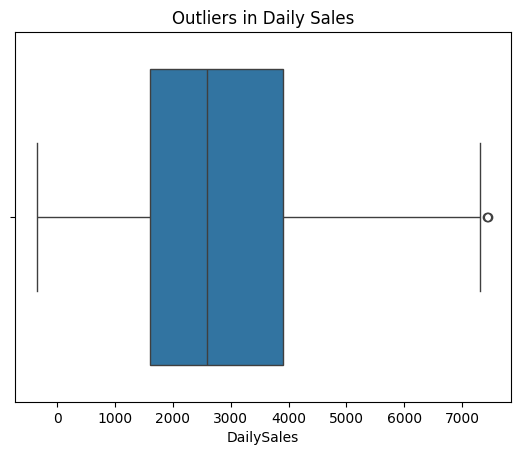

In [18]:
sns.boxplot(x=data['DailySales'])
plt.title("Outliers in Daily Sales")
plt.show()


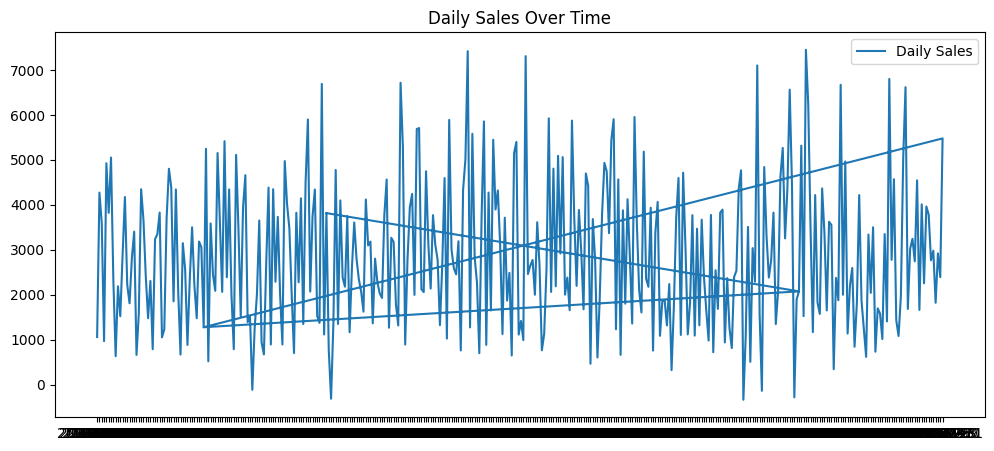

In [20]:
plt.figure(figsize=(12,5))
plt.plot(data['Date'], data['DailySales'], label="Daily Sales")
plt.title("Daily Sales Over Time")
plt.legend()
plt.show()


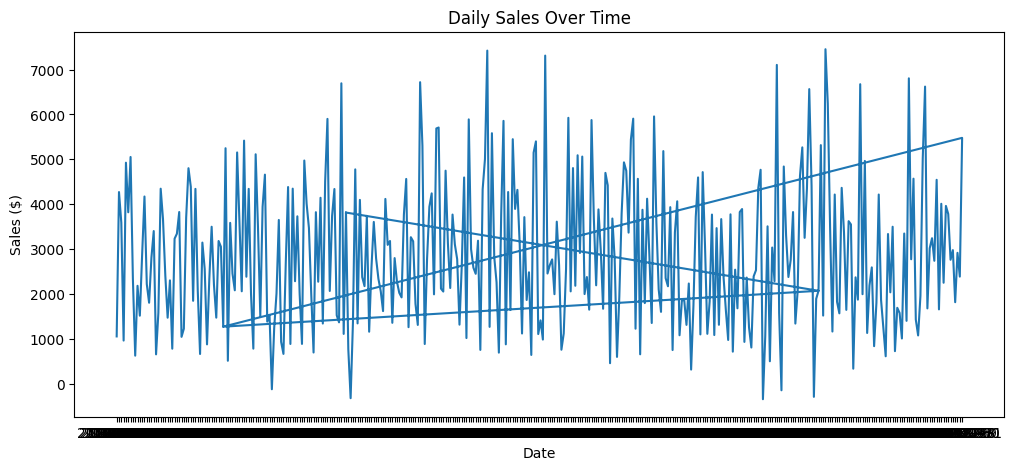

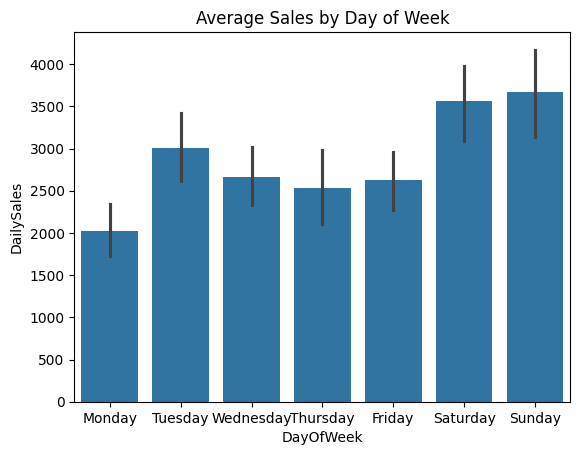

In [22]:
plt.figure(figsize=(12,5))
plt.plot(data['Date'], data['DailySales'])
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales ($)")
plt.show()

# Sales by weekday
sns.barplot(x="DayOfWeek", y="DailySales", data=data)
plt.title("Average Sales by Day of Week")
plt.show()


#UNDERSTAND THE PATTERNS

#Sales over trend

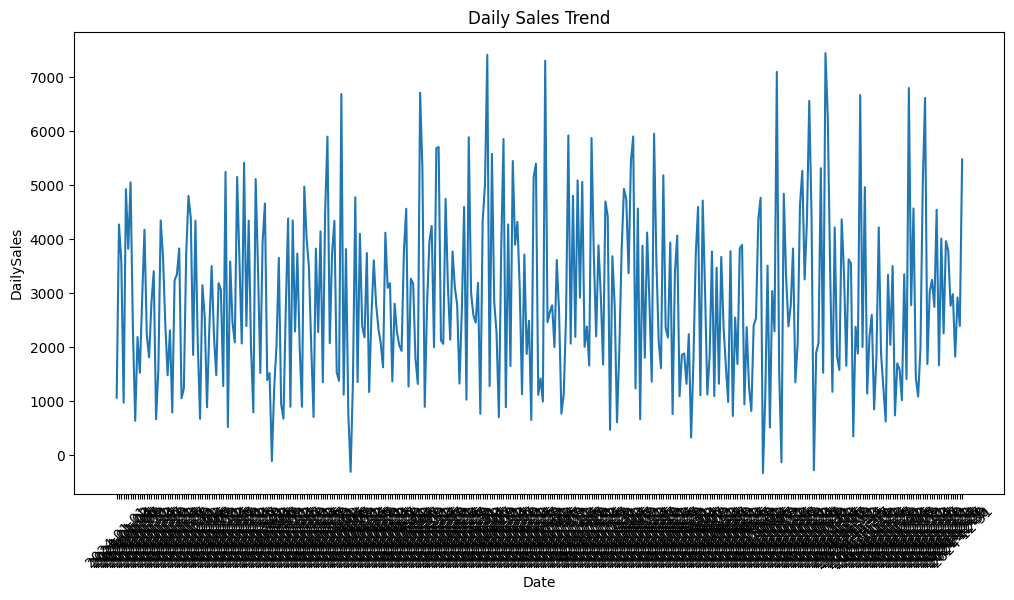

In [23]:
# Line plot to see overall sales trend
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='DailySales', data=data)
plt.title("Daily Sales Trend")
plt.xticks(rotation=45)
plt.show()


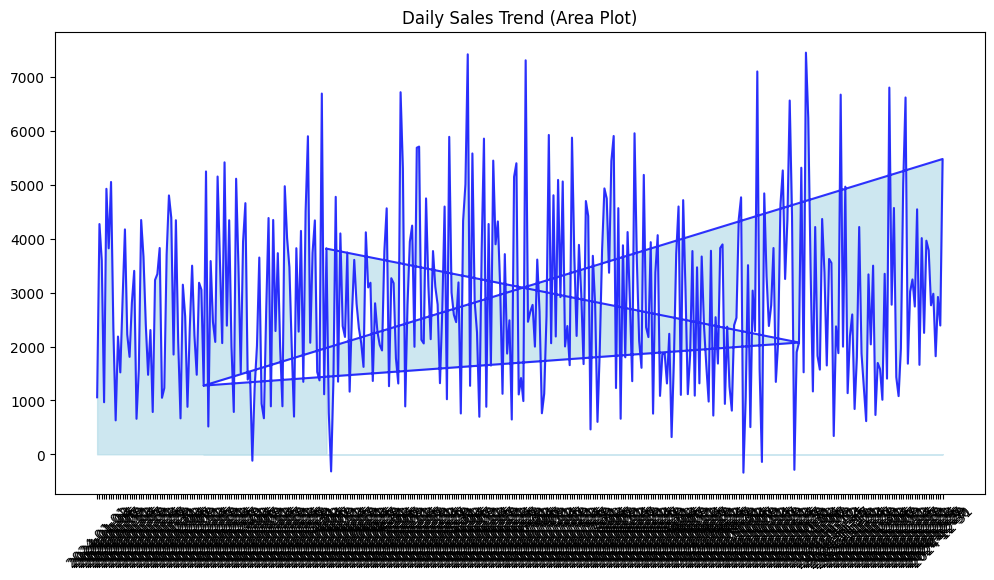

In [26]:
plt.figure(figsize=(12,6))
plt.fill_between(data['Date'], data['DailySales'], color="lightblue", alpha=0.6)
plt.plot(data['Date'], data['DailySales'], color="blue", alpha=0.8)
plt.title("Daily Sales Trend (Area Plot)")
plt.xticks(rotation=45)
plt.show()


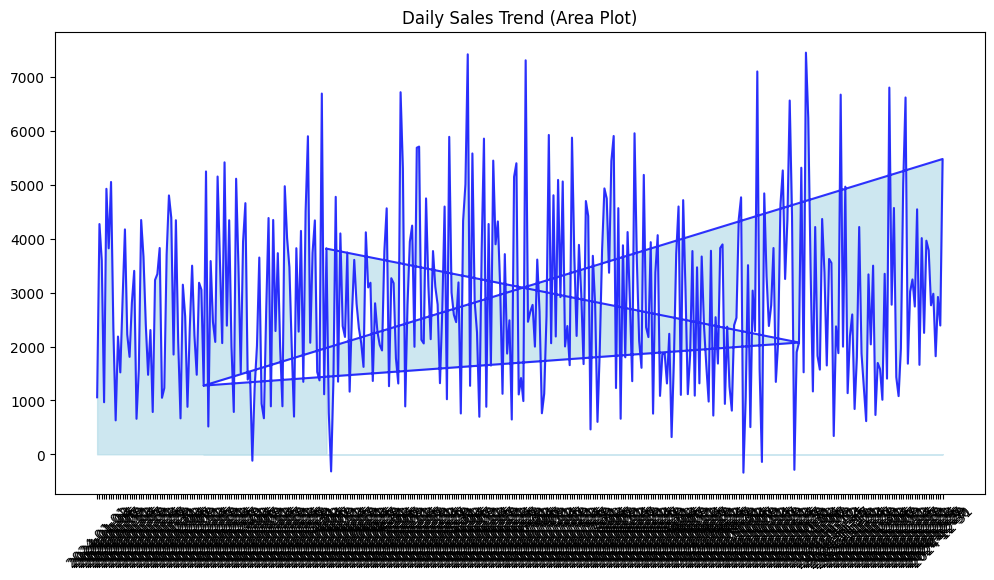

In [27]:
plt.figure(figsize=(12,6))
plt.fill_between(data['Date'], data['DailySales'], color="lightblue", alpha=0.6)
plt.plot(data['Date'], data['DailySales'], color="blue", alpha=0.8)
plt.title("Daily Sales Trend (Area Plot)")
plt.xticks(rotation=45)
plt.show()


#Weekly pattern

/tmp/ipython-input-2700909519.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='DayOfWeek', y='DailySales', data=data, estimator=np.mean, ci=None)


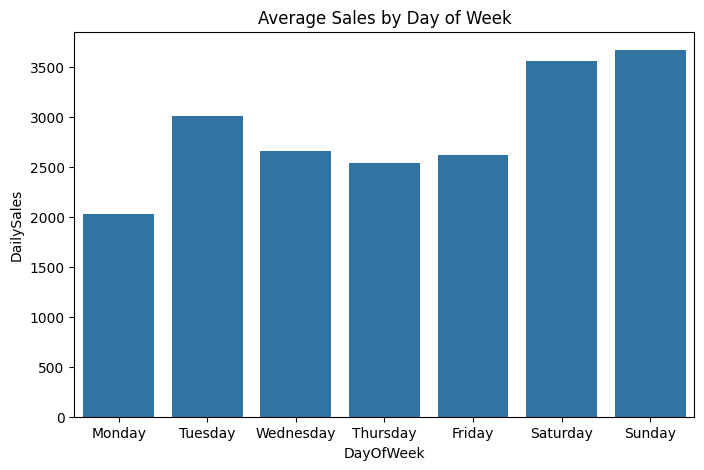

In [28]:
# Average sales per weekday
plt.figure(figsize=(8,5))
sns.barplot(x='DayOfWeek', y='DailySales', data=data, estimator=np.mean, ci=None)
plt.title("Average Sales by Day of Week")
plt.show()


#Monthly Pattern (Seasonality)

/tmp/ipython-input-1949078842.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Month', y='DailySales', data=data, estimator=np.mean, ci=None)


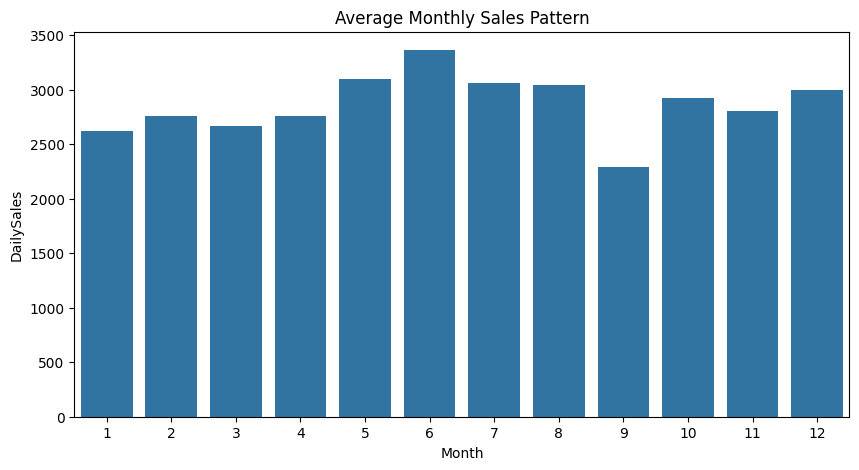

In [29]:
# Extract month if not present
data['Month'] = pd.to_datetime(data['Date']).dt.month

plt.figure(figsize=(10,5))
sns.barplot(x='Month', y='DailySales', data=data, estimator=np.mean, ci=None)
plt.title("Average Monthly Sales Pattern")
plt.show()


#Effect of Weather

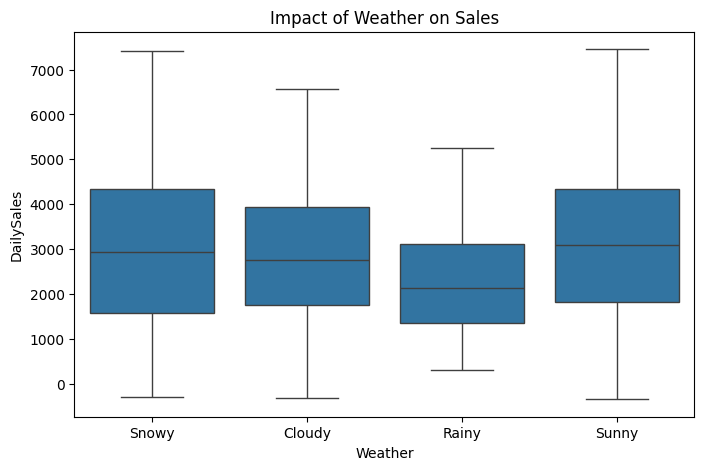

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Weather', y='DailySales', data=data)
plt.title("Impact of Weather on Sales")
plt.show()


## Effect of Holidays / Events

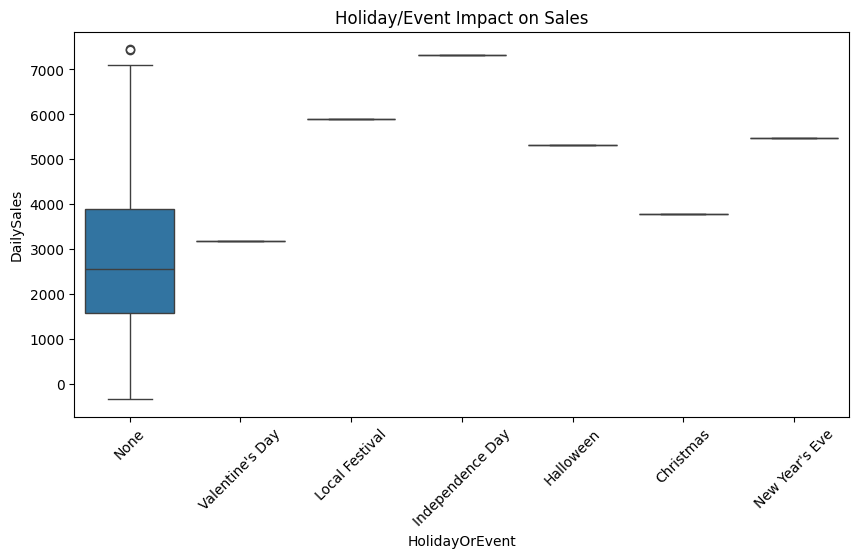

In [32]:
plt.figure(figsize=(10,5))
sns.boxplot(x='HolidayOrEvent', y='DailySales', data=data)
plt.title("Holiday/Event Impact on Sales")
plt.xticks(rotation=45)
plt.show()


##Orders vs Sales (Relationship)

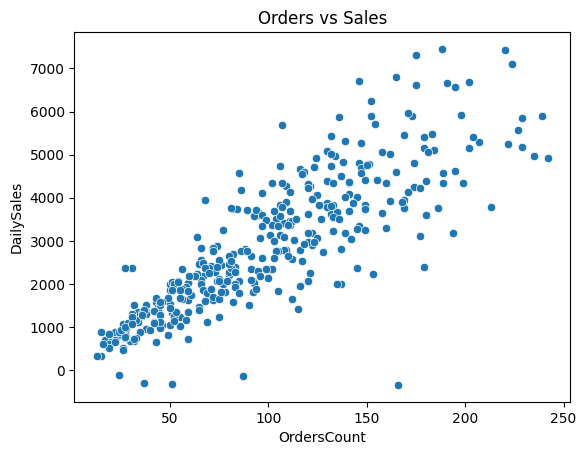

In [33]:
sns.scatterplot(x='OrdersCount', y='DailySales', data=data)
plt.title("Orders vs Sales")
plt.show()


##Staff Count vs Sales

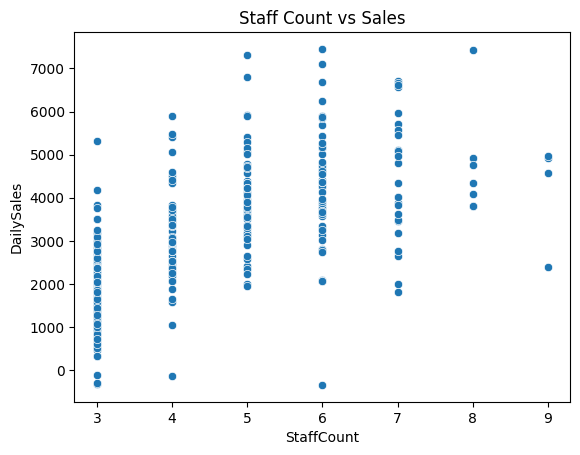

In [34]:
sns.scatterplot(x='StaffCount', y='DailySales', data=data)
plt.title("Staff Count vs Sales")
plt.show()


##PREPARE FOR FORECASTING

In [35]:
# Prophet requires ds and y
sales_df = data[['Date', 'DailySales']].rename(columns={'Date':'ds', 'DailySales':'y'})


##BUILD THE FORECAST

DEBUG:cmdstanpy:input tempfile: /tmp/tmpgxwmi0cp/esmvz2iy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgxwmi0cp/pgh8_3qo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34821', 'data', 'file=/tmp/tmpgxwmi0cp/esmvz2iy.json', 'init=/tmp/tmpgxwmi0cp/pgh8_3qo.json', 'output', 'file=/tmp/tmpgxwmi0cp/prophet_modelpm0sa62z/prophet_model-20251004071051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


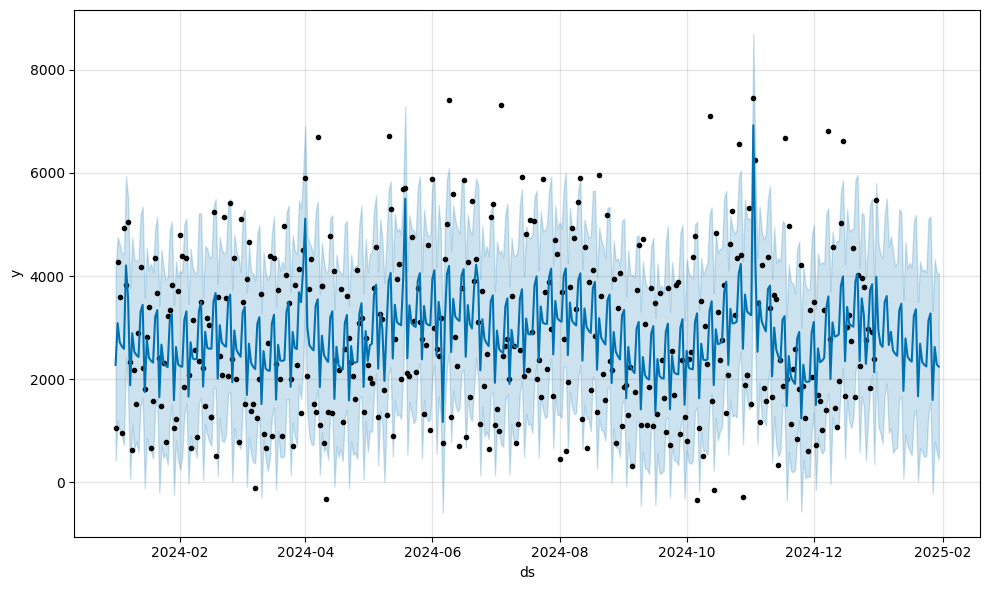

In [37]:
from prophet import Prophet

# Initialize model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.add_country_holidays(country_name='SE')  # Sweden holidays for realism

# Fit model
model.fit(sales_df)

# Create future dataframe (next 30 days)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.show()

##EVALUATE THE MODEL

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Last 30 days actual
actual = sales_df[-30:]['y']
predicted = forecast[-30:]['yhat']

mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 1361.009586721073
RMSE: 1660.1495731965804
